In [28]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [29]:
df = pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')

In [30]:
# Remove unnecessary columns
data = df[['Category', 'Message']]

# Handle missing values
data = data.dropna()

# Clean and preprocess the text
stop_words = set(stopwords.words('english'))
stop_words.update(['kill', "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk",
                   "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up",
                   "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using",
                   "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo",
                   "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn",
                   "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were",
                   "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's",
                   "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein",
                   "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither",
                   "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why",
                   "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won",
                   "wonder", "wont", "won't", "words"])

stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize the text
    text = [word for word in text if word not in stop_words]  # Remove stop words
    text = [stemmer.stem(word) for word in text]  # Stemming
    text = ' '.join(text)  # Join the words back into a single string
    return text

data['Message'] = data['Message'].apply(preprocess_text)

In [31]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [32]:
data = df.where((pd.notnull(df)),'')

In [33]:
data.head(11)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Message'])
y = data['Category']

# Select features using Best First Feature Selection algorithm
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k=500)
X_selected = feature_selector.fit_transform(X, y)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train and test the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
nb_predictions = naive_bayes.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Train and test the Decision Tree classifier
j48 = DecisionTreeClassifier(criterion='entropy') 
j48.fit(X_train, y_train)
j48_predictions = j48.predict(X_test)
j48_accuracy = accuracy_score(y_test, j48_predictions)
j48_confusion_matrix = confusion_matrix(y_test, j48_predictions)


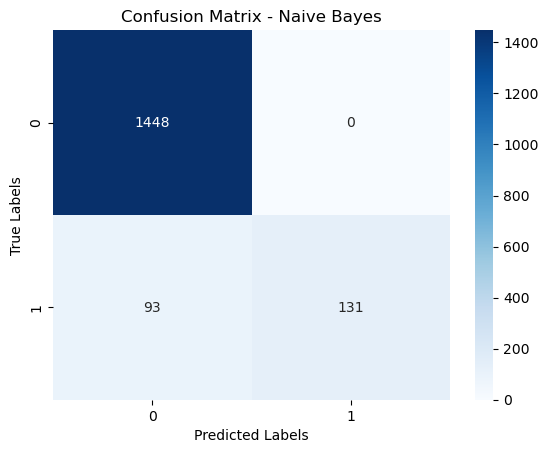

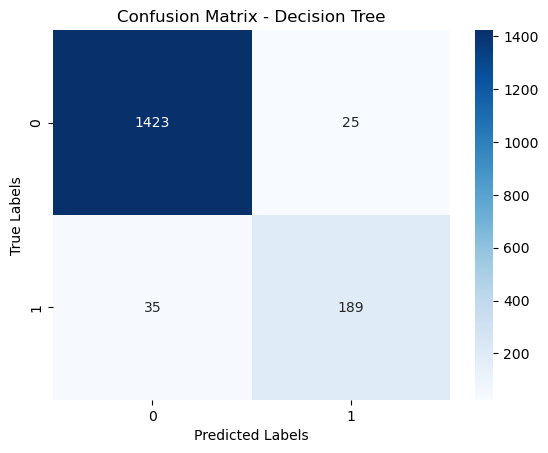

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Naive Bayes
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Plot confusion matrix for Decision Tree
sns.heatmap(j48_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [37]:
print('Naive Bayes Accuracy:', nb_accuracy)
print('J48 (Decision Tree) Accuracy:', j48_accuracy)

Naive Bayes Accuracy: 0.944377990430622
J48 (Decision Tree) Accuracy: 0.9641148325358851
